# CNN Image Classification Practice with Fashion MNIST Dataset
### (Keras | Tensorflow)

#### GOAL: 
Build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

_

**Práctica de clasificación de imágenes con CNN y el Fashion MNIST Dataset**

**OBJETIVO:**

Crar un clasificador de imágenes con Keras y redes neuronales convolucionales para el dataset Fashion MNIST. Este set incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 x 28 *en escala de grises*. Hay un conjunto de entrenamiento de 60,000 imágenes y 10,000 imágenes de prueba.


    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    

---

## Data Exploration | Exploración de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
pd.DataFrame(single_image)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


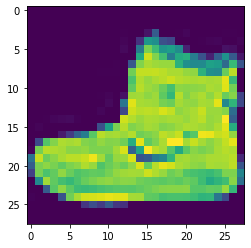

In [7]:
plt.imshow(single_image)

### Data Normalization | Normalización

A simple scaling, dividing by the max value of the image arrays

Escalamiento dividiendo entre el máximo valor en los arreglos de imágenes

In [8]:
single_image.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 255

### Reshaping

**We need to add one more dimension to let the network know we are dealing with a single color channel because the images are in black and white**

Necesitamos agregar una dimensión para que la red sepa que estamos trabajando con un canal simple de color porque las imágenes son en blanco y negro

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### One Hot Encoding

**Let's make sure Keras knows this is a classification problem transforming the y label into categorical data**

Hay que asegurarse que Keras sepa que este es un problema de clasificación transformando y en datos categóricos

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
y_train.shape

(60000,)

In [16]:
y_train[0]

9

In [17]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

---
## Model Training | Entrenamiento del Modelo

**A model consisting of:**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Compiling parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_cat_train, epochs=8, 
          validation_data=(x_test, y_cat_test))

Epoch 1/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5382 - accuracy: 0.8118 - val_loss: 0.3306 - val_accuracy: 0.8806
Epoch 2/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2843 - accuracy: 0.8983 - val_loss: 0.2917 - val_accuracy: 0.8947
Epoch 3/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2325 - accuracy: 0.9145 - val_loss: 0.2607 - val_accuracy: 0.9038
Epoch 4/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2017 - accuracy: 0.9246 - val_loss: 0.2612 - val_accuracy: 0.9068
Epoch 5/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1737 - accuracy: 0.9349 - val_loss: 0.2741 - val_accuracy: 0.9046
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1519 - accuracy: 0.9437 - val_loss: 0.2760 - val_accuracy: 0.9105
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1308 - accuracy: 0.9509 - val_loss: 0.2759 - val_accu

---
## Performance Evaluation | Evaluación del desempeño

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.406015,0.855333,0.330587,0.8806
1,0.278809,0.899200,0.291675,0.8947
2,0.233602,0.914033,0.260663,0.9038
3,0.201489,0.924917,0.261188,0.9068
4,0.176599,0.934217,0.274107,0.9046
5,0.153543,0.942833,0.276037,0.9105
6,0.134043,0.950050,0.275908,0.9070
7,0.118347,0.955300,0.317862,0.9006


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

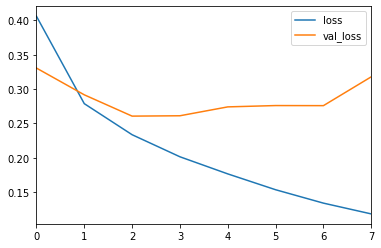

In [23]:
metrics[['loss', 'val_loss']].plot()

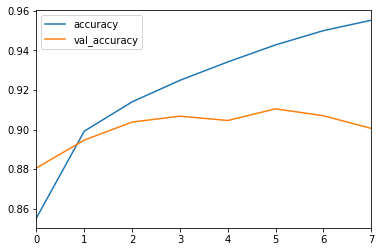

In [24]:
metrics[['accuracy', 'val_accuracy']].plot()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.96      0.99      0.98      1000
           2       0.92      0.73      0.81      1000
           3       0.94      0.87      0.90      1000
           4       0.86      0.83      0.84      1000
           5       0.98      0.99      0.99      1000
           6       0.62      0.86      0.72      1000
           7       0.97      0.98      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



---
## Prediction on a new image

**Predicción sobre una nueva imagen**

In [29]:
x_test[250].shape

(28, 28, 1)

In [35]:
new_image = x_test[350]

In [36]:
new_image = new_image.reshape(28,28)

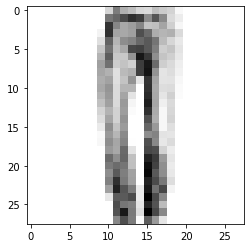

In [40]:
plt.imshow(new_image, cmap='Greys')

In [41]:
y_test[350]

1

In [42]:
np.argmax(model.predict(new_image.reshape(1,28,28,1)), axis=-1)

array([1], dtype=int64)

# Model predicted accurately

**El modelo hizo una predicción precisa**